In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,Age,Kids,Status,Family_size,Expenses,Total_Purchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,1,66,0,1,1,1617,25,3971 days 14:46:24.812721,1,64.680000
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,69,2,1,3,27,6,3421 days 14:46:24.812721,0,4.500000
2,1965,Graduation,Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,58,0,2,2,776,21,3620 days 14:46:24.812721,0,36.952381
3,1984,Graduation,Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,39,1,2,3,53,8,3447 days 14:46:24.812721,0,6.625000
4,1981,PhD,Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,42,1,2,3,422,19,3469 days 14:46:24.812721,0,22.210526


A) Drop columns Year_Birth, Dt_Customer, day, Complain, Response,
AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4,
AcceptedCmp5, Marital_Status, Status, Kids, Education, Kidhome,
Teenhome, Income, Age, Family_Size

In [2]:
df = df.drop(columns = ['Year_Birth', 'Dt_Customer','Engaged_in_days', 'Complain', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Marital_Status', 'Status', 'Kids', 'Education', 'Kidhome', 'Teenhome', 'Income', 'Age', 'Family_size'])

B) Plot heat-map of data correlation

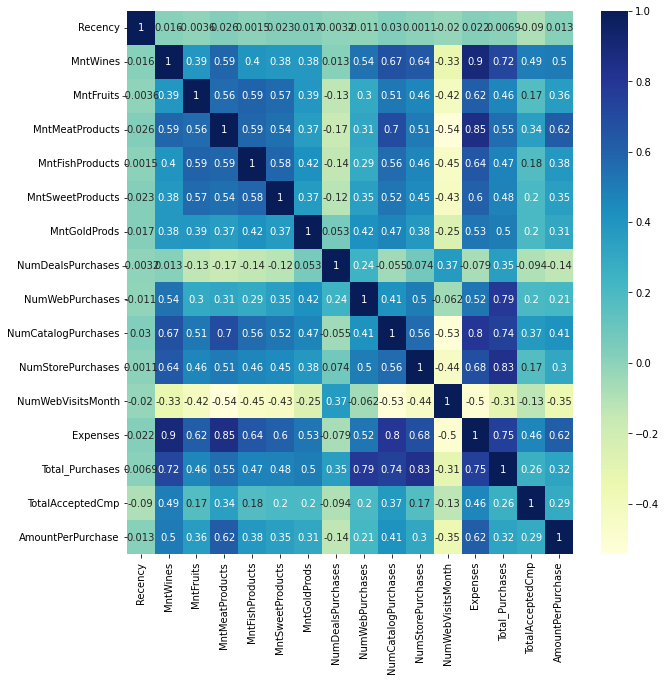

In [3]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.gcf().set_size_inches(10, 10)
plt.show ()

In [4]:
empty = True
for c in df.corr().columns:
    for r in df.corr().columns:
        if r==c:
            continue
        if df.corr()[r][c] >= 0.7:
            if (empty):
                print(c, 'has the most correlation with:', end='  ')
                empty=False
            print(r, end=', ')
        if r==df.corr().columns[df.corr().shape[1] - 1] and not empty:
            print()
    empty = True

MntWines has the most correlation with:  Expenses, Total_Purchases, 
MntMeatProducts has the most correlation with:  NumCatalogPurchases, Expenses, 
NumWebPurchases has the most correlation with:  Total_Purchases, 
NumCatalogPurchases has the most correlation with:  MntMeatProducts, Expenses, Total_Purchases, 
NumStorePurchases has the most correlation with:  Total_Purchases, 
Expenses has the most correlation with:  MntWines, MntMeatProducts, NumCatalogPurchases, Total_Purchases, 
Total_Purchases has the most correlation with:  MntWines, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, Expenses, 


نتیجه میگیریم که بیشترین مشتریها، واین خریدن
کسایی که گوشت خریدن، در هر خرید بیشتر هزینه کردن
کسایی که بیشتر خریدند، گوشت و واین خریدن


C) Scale data using standard scaler

In [5]:
from sklearn.preprocessing import StandardScaler

columns = df.columns
# perform a robust scaler transform of the dataset
data = StandardScaler().fit_transform(df.to_numpy())
# convert the array back to a dataframe
df = pd.DataFrame(data, columns = columns)

D) Fit T-SNE model with 2 components and 35 as perplexity and
random_state=1

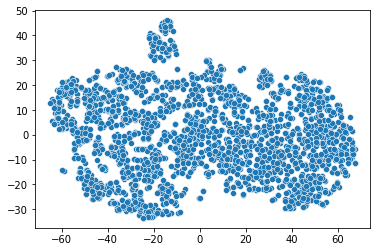

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=35, random_state=1)
df_tsne = tsne.fit_transform(df)
# Create a scatter plot with color-coded points
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1])
plt.show()


E) Apply PCA with random state=1

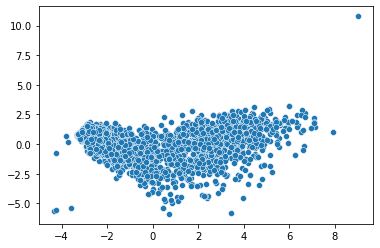

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
df_pca = pca.fit_transform(df)

# Create a scatter plot with color-coded points and a legend
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1])
plt.show()


F) Apply K-means clustering method with 2,3,4,…,9 clusters and add its
distortions to a list and then use elbow method to decide which cluster
size is optimum

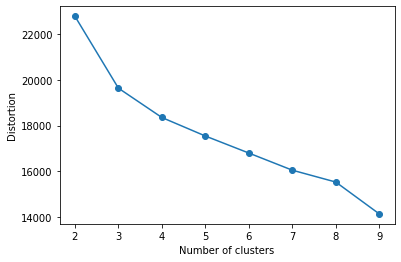

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Therefore, optimum number of clusters is 4.

G) Calculate and print silhouette score for 3, 4, 5, 6 clusters

In [9]:
from sklearn.metrics import silhouette_score

for i in range(3,7):
    # Initialize a KMeans object with the desired number of clusters
    kmeans = KMeans(n_clusters=i, n_init='auto')

    # Fit the KMeans model on your data
    kmeans.fit(df)

    # Compute the silhouette score for the clustering
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    print(silhouette_avg)

0.29963353231863904
0.28080441458965866
0.15963569800825836
0.15725375179862572


So, we can conclude that 3 is the best number of cluster  (highest silhouette score)

H) Apply K-means on PCA data with cluster_size=3 and plot a figure
which visualize data segmentation

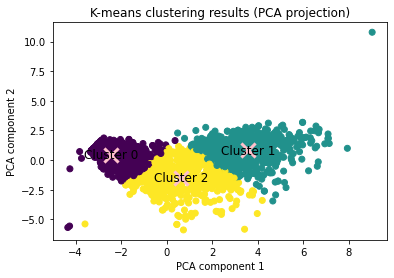

In [10]:
# Initialize a KMeans object with cluster_size=3 and fit the model to the PCA data
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df_pca)

# Create a scatter plot of the PCA components, color-coded by cluster label (c=kmeans.labels_ assigns a color to each cluster)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)

# Plot the centroids as black crosses, size = 200
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='pink')

# Add cluster names as text annotations
for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], f"Cluster {i}", ha='center', va='center', fontsize=12, color='k')


# Add axis labels and title
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('K-means clustering results (PCA projection)')

# Show the plot
plt.show()

I) Use describe function to describe number of each cluster in your
clustering method

In [11]:
cluster_col = pd.Series(kmeans.labels_)
clstr_labels = cluster_col.unique()
for i in clstr_labels:
    print('cluster',i,':',len(cluster_col[cluster_col.eq(i)]))

cluster 1 : 587
cluster 0 : 1035
cluster 2 : 605


J) Plot box-plot of each cluster for each column and write a complete
observation over each clusters and indicate special characteristics of
each cluster

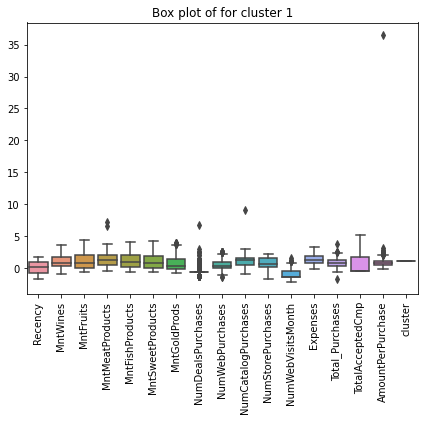

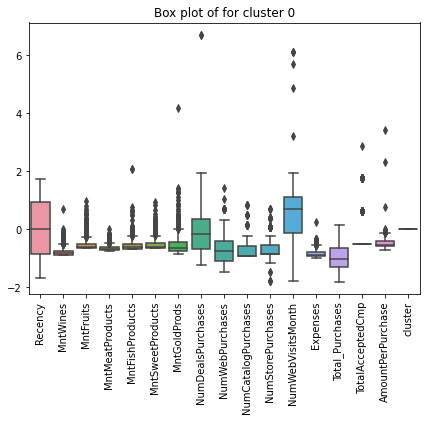

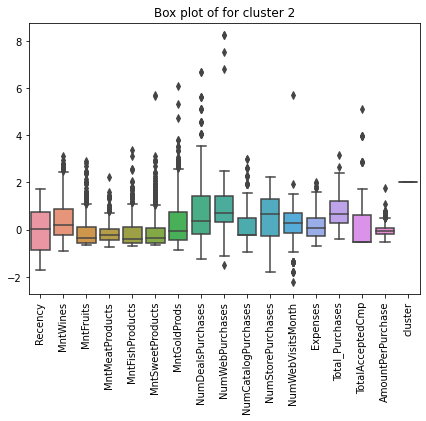

In [12]:
cluster_col = cluster_col.rename('cluster')
# Concatenate the DataFrame and Series
cdf = pd.concat([df, cluster_col], axis=1)

for i in clstr_labels:
    d = cdf[cdf['cluster'] == i]
    d = d.reset_index(drop=True)
    sns.boxplot(data = d)
    plt.title(f"Box plot of for cluster {i}")
    #Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.gcf().set_size_inches(7, 5)
    
    plt.show()

کلاستر ۰ چگالی بالا داره و پراکندگی کمتر و نصف جمعیت در این کلاستر هستن.
کمپین های قبول شده ش کمه. بیشتر طلا خریده و تعداد بازدید سایتش زیاده ولی خریداش کمن.
کلاستر۱ بیشتر واین و طلا خریده، کمپین بیشتری قبول کرده، تعداد کل خریداش بیشتره، 
کلاستر ۲، اوتلایر زیاد داره.کمپین بیستری قبول کرده.بیشتر خرید کاتالوگ داشته.بیشتر میوه و خوراکی خریدن.

K) Do tasks H, I and J for 5 clusters with random_state=0

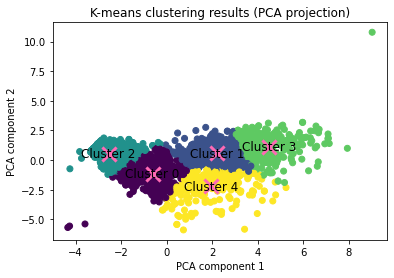

In [13]:
# Initialize a KMeans object with cluster_size=5 and fit the model to the PCA data
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=0)
kmeans.fit(df_pca)

# Create a scatter plot of the PCA components, color-coded by cluster label (c=kmeans.labels_ assigns a color to each cluster)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)

# Plot the centroids as black crosses, size = 200
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='hotpink')

# Add cluster names as text annotations
for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], f"Cluster {i}", ha='center', va='center', fontsize=12, color='k')

# Add axis labels and title
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('K-means clustering results (PCA projection)')

# Show the plot
plt.show()

In [14]:
cluster_col = pd.Series(kmeans.labels_)
clstr_labels = cluster_col.unique()
for i in clstr_labels:
    print('cluster',i,':',len(cluster_col[cluster_col.eq(i)]))

cluster 3 : 301
cluster 2 : 927
cluster 1 : 339
cluster 0 : 402
cluster 4 : 258


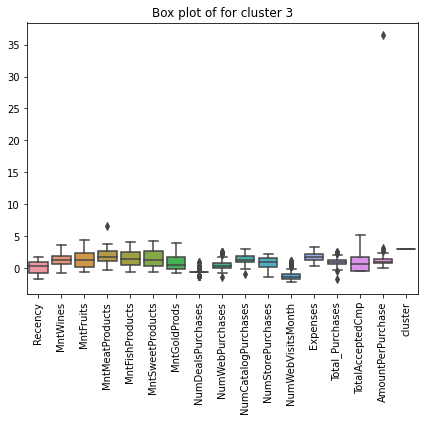

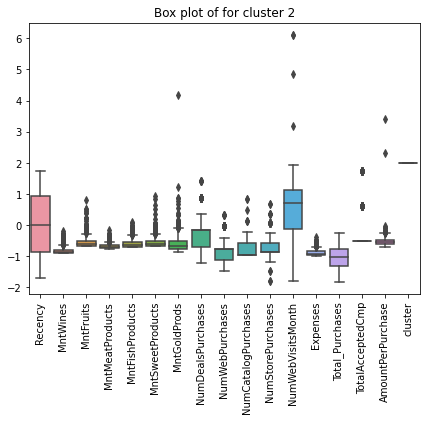

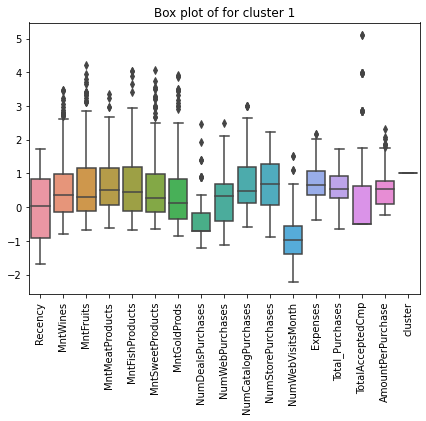

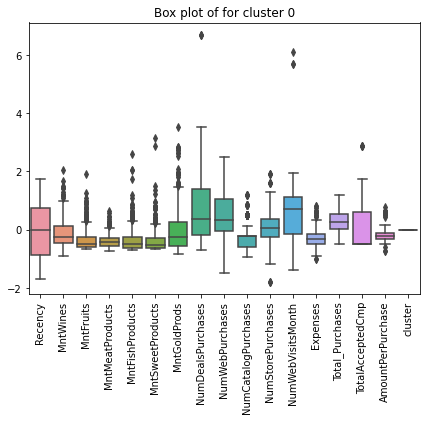

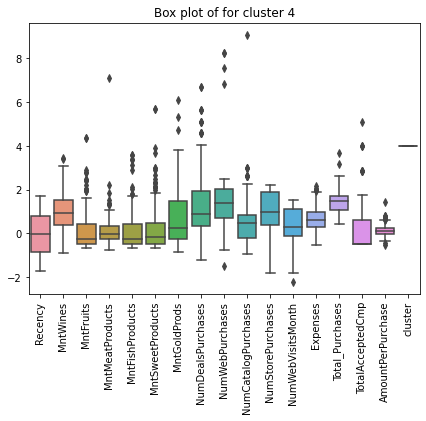

In [15]:
cluster_col = cluster_col.rename('cluster')
# Concatenate the DataFrame and Series
cdf = pd.concat([df, cluster_col], axis=1)

for i in clstr_labels:
    d = cdf[cdf['cluster'] == i]
    d = d.reset_index(drop=True)
    sns.boxplot(data = d)
    plt.title(f"Box plot of for cluster {i}")
    #Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.gcf().set_size_inches(7, 5)
    
    plt.show()


L) Now use K-Medoids method with number of clusters=5 and
random_state=1 and do all tasks H, I and J

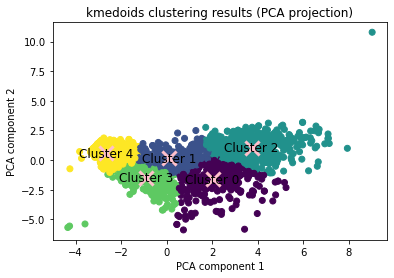

In [16]:
from sklearn_extra.cluster import KMedoids

# Initialize the KMedoids model
kmedoids = KMedoids(n_clusters=5, random_state=1)

# Fit the model to the data
kmedoids.fit(df_pca)

# Create a scatter plot of the PCA components, color-coded by cluster label (c=kmeans.labels_ assigns a color to each cluster)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmedoids.labels_)

# Plot the centroids as black crosses, size = 200
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='pink')

# Add cluster names as text annotations
for i, center in enumerate(kmedoids.cluster_centers_):
    plt.text(center[0], center[1], f"Cluster {i}", ha='center', va='center', fontsize=12, color='k')


# Add axis labels and title
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('kmedoids clustering results (PCA projection)')

# Show the plot
plt.show()

In [17]:
cluster_col = pd.Series(kmedoids.labels_)
clstr_labels = cluster_col.unique()
for i in clstr_labels:
    print('cluster',i,':',len(cluster_col[cluster_col.eq(i)]))

cluster 2 : 476
cluster 4 : 900
cluster 0 : 328
cluster 3 : 287
cluster 1 : 236


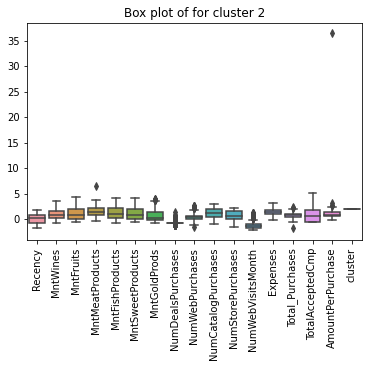

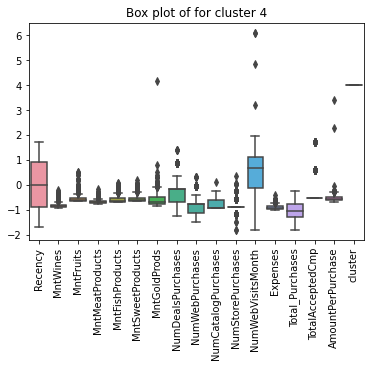

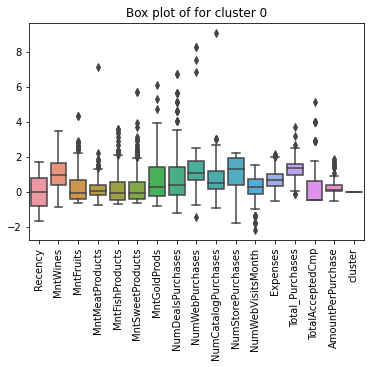

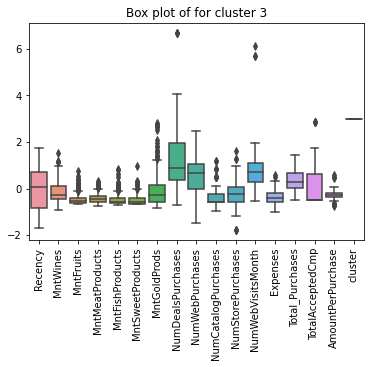

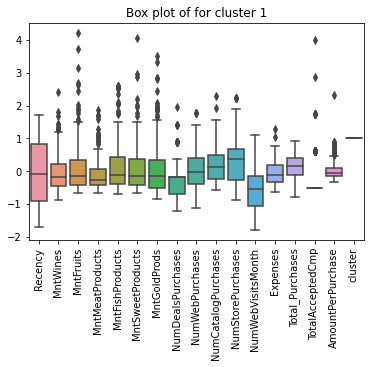

In [18]:
cluster_col = cluster_col.rename('cluster')
# Concatenate the DataFrame and Series
cdf = pd.concat([df, cluster_col], axis=1)

for i in clstr_labels:
    d = cdf[cdf['cluster'] == i]
    d = d.reset_index(drop=True)
    sns.boxplot(data = d)
    plt.title(f"Box plot of for cluster {i}")
    #Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.show()

کلاستر ۰، خیلی واین (میانگین بالای ۰) و طلا زیاد خریده. بیشتر حضوری و از سایت خریده.وب ویزیت بالا نسبتا. خریداش زیاده.کمپین هم زیاد قبول کرده.
کلاستر۱، همه چیز خریده اما همه میانگین صفره.بیشتر حضوری خریده. ببازدید سایت پایینه. کمپن اصلا قبول نکرده. 
کلاستر۲، اوتلایر زیاد. بازدید سایت کم، بیشار واین وگوشت خریده. کمپین قبول کردنش خوبه. هزینه نسبتا بالاست. 
کلاستر ۳، خریدش خیلی کمه. اما هر بار که خریده تعداد زیاد خریده. بیشتر از وب خریده. بازید سایت بالا. هزینه کم. کمپین هم نسبتا متوسط
کلاستر ۴، بیشترین تعداد و جگالی زیاد. خرید خیلی کم. بیشتر طلا و میوه. بیشتر از کاتالوگ خریده. از مغازه خیلییی کم. کمپین بسیار کم. هزینه کم.

M) Draw dendrogram of data with single, complete and average linkage
with euclidean, chebyshev, mahalanobis and cityblock distance metrics

euclidean_distances single


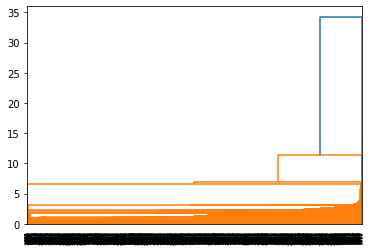

euclidean_distances complete


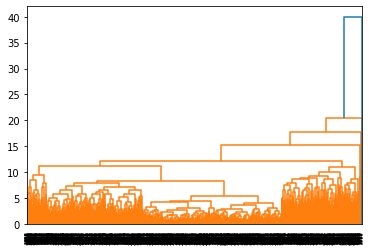

euclidean_distances average


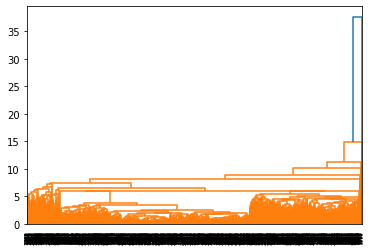

chebyshev_distances single


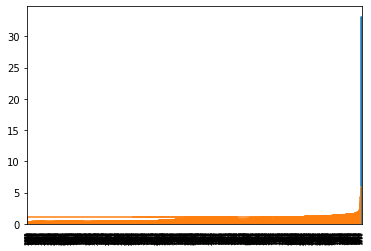

chebyshev_distances complete


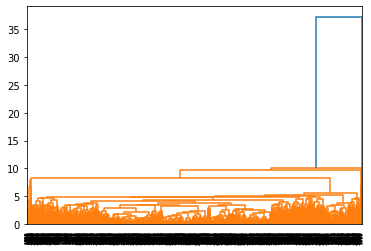

chebyshev_distances average


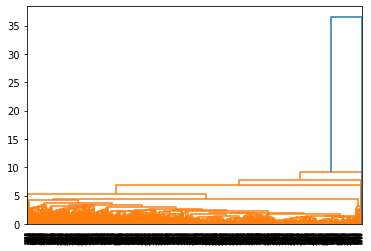

mahalanobis_distances single


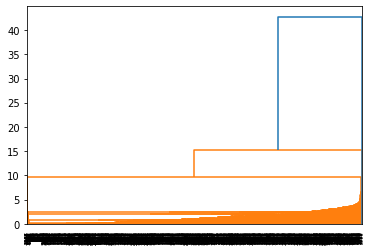

mahalanobis_distances complete


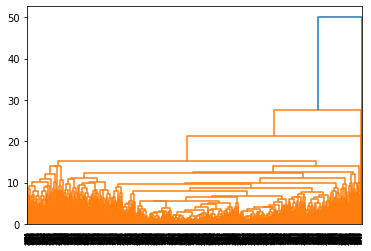

mahalanobis_distances average


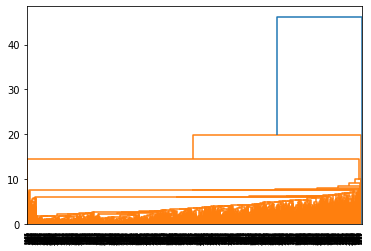

cityblock_distances single


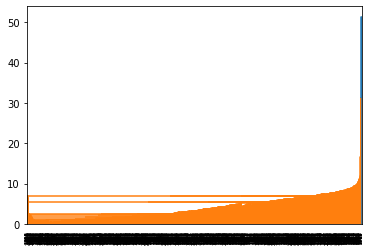

cityblock_distances complete


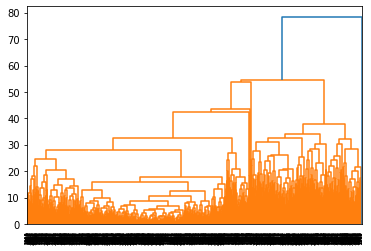

cityblock_distances average


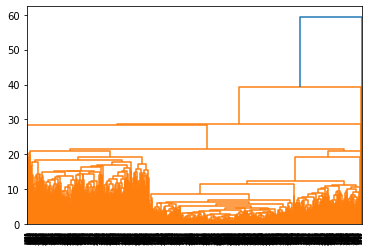

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

data = df

d_names = ['euclidean_distances', 'chebyshev_distances', 'mahalanobis_distances', 'cityblock_distances']
# Create distance matrices
euclidean_distances = pdist(data, metric='euclidean')
chebyshev_distances = pdist(data, metric='chebyshev')
mahalanobis_distances = pdist(data, metric='mahalanobis')
mask = np.logical_or(np.isnan(mahalanobis_distances), np.isinf(mahalanobis_distances))
mahalanobis_distances[mask] = 0
cityblock_distances = pdist(data, metric='cityblock')

distances = [euclidean_distances, chebyshev_distances, mahalanobis_distances, cityblock_distances]
linkage_methods = ['single', 'complete', 'average']

for d, d_name in zip(distances, d_names):
    for l in linkage_methods:
        linkage_matrix = linkage(d, method=l)
        
        plt.figure()
        dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
        print(d_name, l)
        plt.show()

the best method seems to be cityblock_distances complete linkage and then the other distances with complete linkage method.


N) Cluster data with agglomerative method with 3 clusters,
affinity=euclidean and linkage=ward and repeat all tasks H, I and J

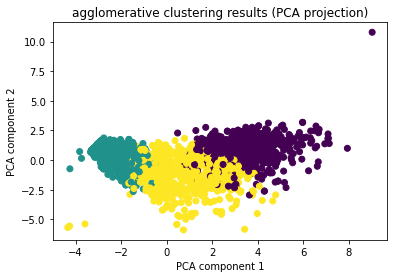

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Cluster the data using agglomerative clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(df)

# Create a scatter plot of the PCA components, color-coded by cluster label (c=kmeans.labels_ assigns a color to each cluster)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=model.labels_)

# Add axis labels and title
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('agglomerative clustering results (PCA projection)')

# Show the plot
plt.show()

In [21]:
cluster_col = pd.Series(model.labels_)
clstr_labels = cluster_col.unique()
for i in clstr_labels:
    print('cluster',i,':',len(cluster_col[cluster_col.eq(i)]))

cluster 0 : 564
cluster 1 : 1003
cluster 2 : 660


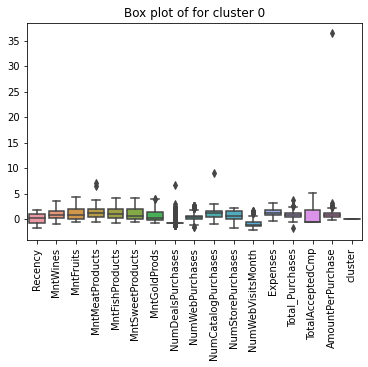

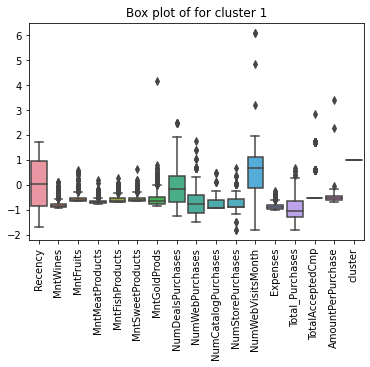

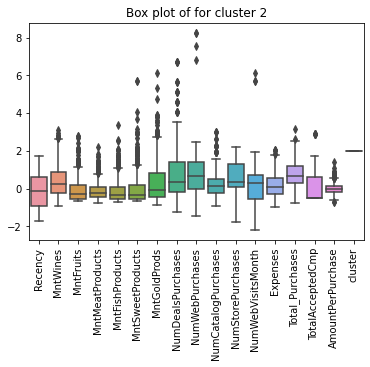

In [22]:
cluster_col = cluster_col.rename('cluster')
# Concatenate the DataFrame and Series
cdf = pd.concat([df, cluster_col], axis=1)

for i in clstr_labels:
    d = cdf[cdf['cluster'] == i]
    d = d.reset_index(drop=True)
    sns.boxplot(data = d)
    plt.title(f"Box plot of for cluster {i}")
    #Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.show()

کلاستر۰: اوتلایر زیاد داره، همه چیز خرید داشتن، کمپین نسبتا خوب قبول کردن، بازدید سایت کم، بیشتر با  کاتالوگ یا حضوری خریدن.
کلاستر۱: بیشترین تعداد و چگالی، بازدید سایت بالا، کمپین خیلی کم، خرید کم، بیشتری خرید وب
کلاستر۲: بیشتر واین خریدن، وب و حضوری خریدن،  


O) Cluster data and data_pca with DBSCAN and Gaussian Mixture Model
methods with optimized parameters and repeat tasks H, I and J

silhouette score obtained: 0.37992690268103263
Number of clusters: 1
Cluster sizes:
Cluster 0: 2128


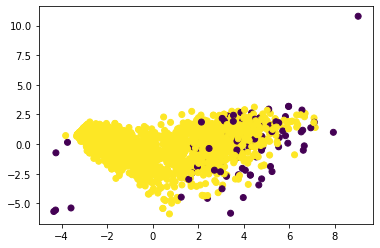

In [23]:
from sklearn.cluster import DBSCAN

# optimizing DBSCAN parameters:
# eps defines the radius of the neighborhood around each point. 
# min_samples defines the minimum number of points that must be within the eps radius of 
#             a point for it to be considered a core point
eps_values = [0.5, 1, 2, 3]
min_samples_values = [3, 5, 10, 15]
best_eps, best_min_samples, best_sil_score = None, None, -1

for r in eps_values:
    for m in min_samples_values:
        dbscan = DBSCAN(eps=r, min_samples=m)
        clusters = dbscan.fit_predict(df)
        num_clusters = len(np.unique(clusters)) - 1  # exclude noise (-1)
        sil_score = silhouette_score(df, clusters)
        if sil_score > best_sil_score:
            best_eps, best_min_samples, best_sil_score = r, m, sil_score

# run DBSCAN with optimized parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(df)

# print number of clusters and their sizes and sil_score
print(f'silhouette score obtained: {best_sil_score}')
print('Number of clusters:', len(np.unique(clusters)) - 1)
print('Cluster sizes:')
for cluster in np.unique(clusters):
    if cluster == -1:
        continue
    print(f'Cluster {cluster}: {np.sum(clusters == cluster)}')

# plot clusters
import matplotlib.pyplot as plt
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.show()

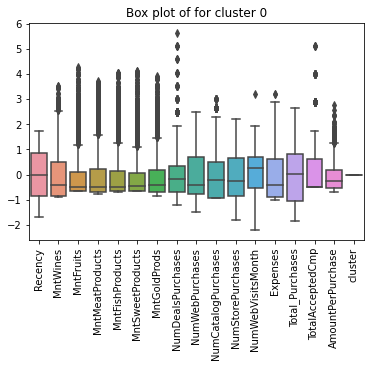

In [24]:
cluster_col = pd.Series(clusters)
cluster_col = cluster_col.rename('cluster')
# Concatenate the DataFrame and Series
cdf = pd.concat([df, cluster_col], axis=1)

for i in np.unique(clusters):
    if i == -1:
        continue
    d = cdf[cdf['cluster'] == i]
    d = d.reset_index(drop=True)
    sns.boxplot(data = d)
    plt.title(f"Box plot of for cluster {i}")
    #Rotate x-axis labels
    plt.xticks(rotation=90)
    
    plt.show()

چون دی بی اسکن بر اساس چگالی هست، روی این دیتا خوب جواب نداده و همه رو یک دسته کرده

sil_score: 0.3052819852328042
Number of clusters: 3
Cluster sizes:
Cluster 0: 1134
Cluster 1: 581
Cluster 2: 512


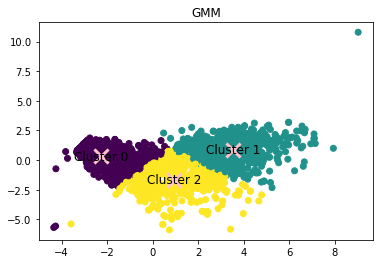

In [25]:
from sklearn.mixture import GaussianMixture

# optimize GMM parameters
# n_component = the number of Gaussian distributions to use (the number of clusters)
# covariane_type = the form of the covariance matrix for each Gaussian distribution
n_components_values = [3, 4, 5, 7]
covariance_type_values = ['full', 'tied', 'diag', 'spherical']
best_n_components_gmm, best_covariance_type_gmm = None, None
best_score = -1

for n in n_components_values:
    for c in covariance_type_values:
        gmm = GaussianMixture(n_components=n, covariance_type=c)
        clusters = gmm.fit_predict(df)
        score = silhouette_score(df, clusters)
        if score > best_score:
            best_n_components_gmm, best_covariance_type_gmm, best_score = n, c, score

# run GMM with optimized parameters
gmm = GaussianMixture(n_components=best_n_components_gmm, covariance_type=best_covariance_type_gmm)
clusters_gmm = gmm.fit_predict(df_pca)

print(f'sil_score: {best_score}')
print(f'Number of clusters: {len(np.unique(clusters_gmm))}')
print('Cluster sizes:')
for cluster in np.unique(clusters_gmm):
    print(f'Cluster {cluster}: {np.sum(clusters_gmm == cluster)}')

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_gmm, cmap='viridis')

# Plot the centroids as black crosses, size = 200
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=200, linewidths=3, color='pink')

# Add cluster names as text annotations
for i, center in enumerate(gmm.means_):
    plt.text(center[0], center[1], f"Cluster {i}", ha='center', va='center', fontsize=12, color='k')

plt.title('GMM')
plt.show()

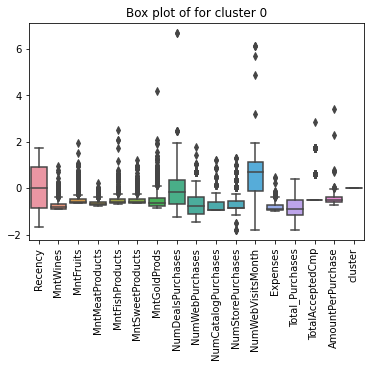

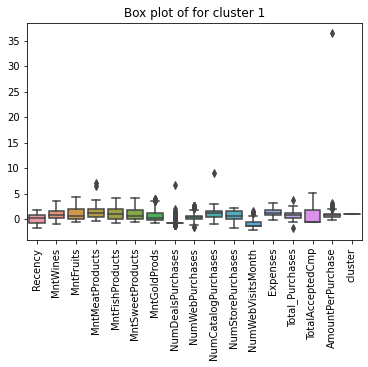

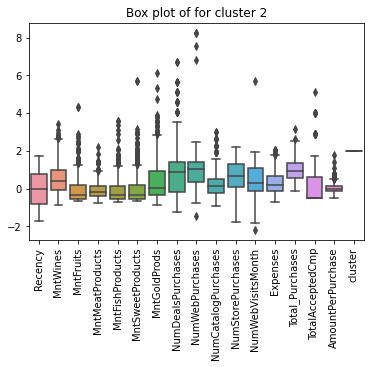

In [26]:
cluster_col = pd.Series(clusters_gmm)
cluster_col = cluster_col.rename('cluster')
# Concatenate the DataFrame and Series
cdf = pd.concat([df, cluster_col], axis=1)

for i in np.unique(clusters_gmm):
    d = cdf[cdf['cluster'] == i]
    d = d.reset_index(drop=True)
    sns.boxplot(data = d)
    plt.title(f"Box plot of for cluster {i}")
    #Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.show()

کلاسنر۰: بیشترین تعداد داده ها خرید کم، بیشتر از طریق وب، بازدید وب بالا، قبول کمپین خیلی کم

کلاستر ۱: خرید واین و طلای زیاد، خرید زیاد در هر بار، بیشتر حضوری، کمپین قبول کردن متوسط

کلاستر۲: اوتلایر، خرید خوراکی بیشتر، قبول کمپین زیاد، بازدید سایت کم، خرید بیشتر کاتالوگ و حضوری


P) Write and conclusion and recommendation on all methods and
parameters you use and describe them as detailed as you can. You must
answer these questions:

1)What are the most meaningful insights from the
data relevant to the problem?

2)How do different techniques perform?
Which one is performing relatively better? Is there scope to improve the
performance further?

3)What model do you propose to be adopted? Why
is this the best solution to adopt?

مشتری ها سه دسته اند: ۱: بیشترشون خرید نمیکنن ، فقط بازدید از سایت دارن. ۲: مشتری های حضوری که کمپین کمتر قبول کردن، ۳: کسایی کهبیشتر حضوری و با شیپینگ، خوراکی بیشتری خریدن و سایت را کمتر دیده اند.

تکنیک دندروگرام بسیار کند بود. تکنیک دی بی اسکن مناسب نبود اما بقیه روش ها تقریبا مشابه عمل کردند

تکنیک گاسین بهترین بود چون تعداد کلاستر رو خودش پیدا کرد و همچنین سرعتش خوب بود
اگر با تکنیک البو خودمون تعداد کلاستر رو بیابیم، کی مینز هم مناسبه